In [ ]:
!pip install pandas
!pip install -U scikit-learn
!pip install joblib
!pip install flask
!pip install seaborn

### Reading dataset

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split as tsp
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import normalize, StandardScaler, LabelEncoder, Normalizer
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('heart.csv')

X = df.drop(['output'], axis=1)
y = df['output']


X_train, X_test, y_train, y_test = tsp(X, y, test_size=0.2, random_state=0)


Normalizing

In [179]:
nm = StandardScaler()
nm.fit(X_train)
X_train = nm.transform(X_train)
X_test = nm.transform(X_test)

### Used models list

In [196]:
models = {
  "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=32, min_samples_split=11),
  "RandomForestClassifier": RandomForestClassifier(),
  "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3),
  "SVC": SVC(gamma='auto')
}

Model Param Finder

In [119]:
params = (0, 0)
bestAccuracy = 0

for j in range(1, 300, 10):
  for i in range(2, 300, 10):
    model = DecisionTreeClassifier(
        min_samples_split=i,
        max_depth=j
    )
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if(accuracy > bestAccuracy):
      params = (i, j)
      bestAccuracy = accuracy

print(params)

(52, 11)


#### 4-algorithm precision testing and training

In [220]:
for alg in models:
  model = models[alg]
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  print(alg)
  print(f"test pontuation: {(accuracy_score(y_test, y_pred)*100):.2f}%")

  y_pred = model.predict(X_train)
  print(f"train pontuation: {(accuracy_score(y_train, y_pred)*100):.2f}%")
  print('\n')

DecisionTreeClassifier
test pontuation: 85.25%
train pontuation: 95.45%


RandomForestClassifier
test pontuation: 86.89%
train pontuation: 100.00%


KNeighborsClassifier
test pontuation: 81.97%
train pontuation: 88.43%


SVC
test pontuation: 85.25%
train pontuation: 91.32%




#### Predict

In [230]:
def predict(inputData):
  inputData = np.array(inputData)
  data = nm.transform([inputData])
  
  prediction = models["SVC"].predict(data)

  if(prediction == 0):
    return "Chances baixas"
  elif(prediction == 1):
    return "Chances altas!"

data = [ 34,1,3,118,182,0,0,174,0,0,2,0,2 ]

data2 = [ 58,1,1,120,284,0,0,160,0,1.8,1,0,2 ]



predict(data2)

[[1.72612589e+04 7.54199420e+02 6.01424214e+02 3.63285992e+04
  2.20371767e+05 1.33686434e+02 3.06800594e+02 4.59069363e+04
  2.16985744e+02 8.16941857e+02 1.00564162e+03 2.22265854e+02
  1.63332343e+03]]


'Chances baixas'

#### Data View

In [199]:
y_pred = models["SVC"].predict(X_test)
confusion_matrix(y_test, y_pred)

array([[20,  7],
       [ 2, 32]], dtype=int64)

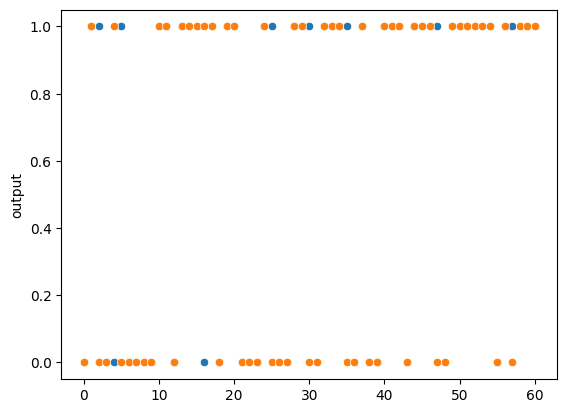

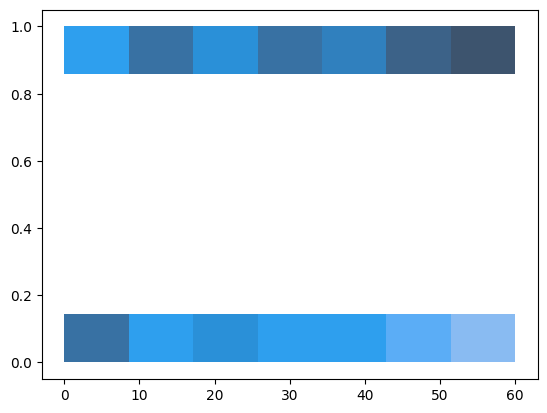

In [204]:
sns.scatterplot(x=range(len(y_test)), y=y_pred)
sns.scatterplot(x=range(len(y_test)), y=y_test )
plt.show()

sns.histplot(x=range(len(y_test)), y=y_pred)
plt.show()


### Flask

In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/prediction', methods=['POST'])
def predictionPost():
  data = request.json
  return predict(data.get('data'))

app.run(port=8080)